# Exploratory Data Analysis
### Load processed data and explore data for patterns

### 1. Import libraries

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import re
import datetime
from tqdm import tqdm

### 2. Load dataframe

In [2]:
ticker_symbol = "RTX"
merged_substituted_labeled_df = pd.read_pickle(f"../data/processed/{ticker_symbol}_merged_substituted_labeled_df.pkl")

In [3]:
merged_substituted_labeled_df

,Open,High,Low,Close,Adj Close,Next Adj Close,Price Change Label,Volume,Ticker Symbol,Publish Date,Title,Body Text,URL,Negative Score,Neutral Score,Positive Score,Compound Score
Date,,,,,,,,,,,,,,,,,
2017-06-23,76.784142,77.054749,76.456894,76.916298,65.686562,65.498444,0,6119398,RTX,2017-06-23,Layoffs planned at Carrier By Seeking Alpha,Please try another search,https://www.investing.com/news/stock-market-ne...,0.000,0.566,0.434,0.3182
2017-06-26,77.035873,77.463814,76.658279,76.696037,65.498444,65.347954,0,2613111,RTX,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0000
2017-06-27,76.727501,76.865952,76.469475,76.519821,65.347954,65.837029,1,2706226,RTX,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0000
2017-06-28,76.821899,77.155441,76.582756,77.092514,65.837029,65.380203,0,2862107,RTX,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0000
2017-06-29,77.042168,77.067337,75.909378,76.557587,65.380203,65.627426,1,3747815,RTX,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14,82.180000,82.250000,80.610001,80.690002,80.099564,80.040001,0,13128900,RTX,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0000
2023-11-15,80.510002,81.250000,79.779999,80.629997,80.040001,80.230003,1,10757800,RTX,2023-11-15,RTX's Pratt & Whitney Wins $870M Contract for ...,"Published Nov 15, 2023 09:05AM ET\n\nRTX's (RT...",https://www.investing.com/news/assorted/rtxs-p...,0.007,0.879,0.114,0.9571
2023-11-16,80.470001,80.830002,79.930000,80.230003,80.230003,79.680000,0,7578700,RTX,2023-11-16,Lockheed Martin shares edge up amid broader ma...,"Published Nov 15, 2023 10:45PM ET\n\nLMT +0.39...",https://www.investing.com/news/stock-market-ne...,0.018,0.848,0.134,0.9887


### 3. Explore data

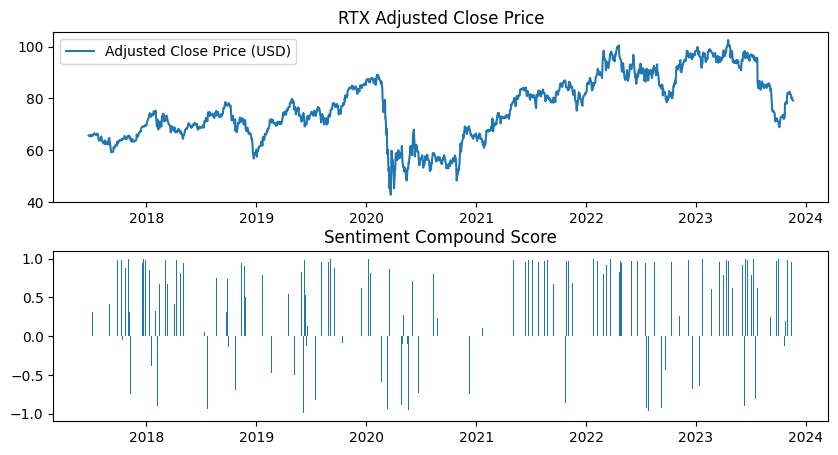

In [20]:
# Visualize data
# Adjusted Close and relation to sentiment scores

top = plt.subplot2grid((7,4), (0, 0), rowspan=3, colspan=4) 
top.plot(merged_substituted_labeled_df.index, merged_substituted_labeled_df['Adj Close'], label = 'Adjusted Close Price (USD)') 
plt.title('RTX Adjusted Close Price') 
plt.legend(loc=2) 

bottom = plt.subplot2grid((7,4), (3,0), rowspan=3, colspan=4) 
bottom.bar(merged_substituted_labeled_df.index, merged_substituted_labeled_df["Compound Score"]) 
plt.title('Sentiment Compound Score') 
plt.gcf().set_size_inches(10,6) 
plt.subplots_adjust(hspace=2)

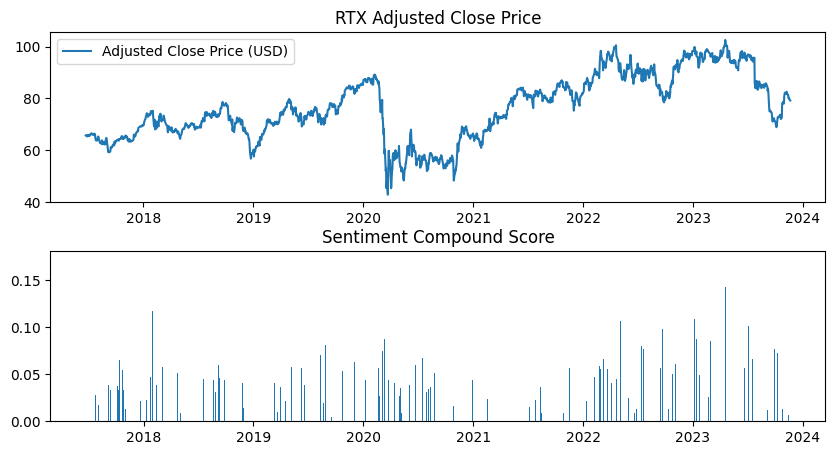

In [21]:
# Let's look at negative scores only:
top = plt.subplot2grid((7,4), (0, 0), rowspan=3, colspan=4) 
top.plot(merged_substituted_labeled_df.index, merged_substituted_labeled_df['Adj Close'], label = 'Adjusted Close Price (USD)') 
plt.title('RTX Adjusted Close Price') 
plt.legend(loc=2) 

bottom = plt.subplot2grid((7,4), (3,0), rowspan=3, colspan=4) 
bottom.bar(merged_substituted_labeled_df.index, merged_substituted_labeled_df["Negative Score"]) 
plt.title('Sentiment Compound Score') 
plt.gcf().set_size_inches(10,6) 
plt.subplots_adjust(hspace=2)

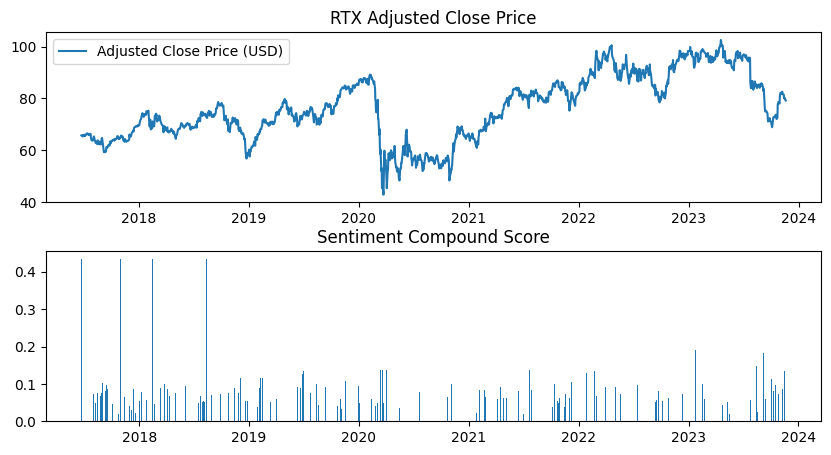

In [22]:
# Now positive scores only:
top = plt.subplot2grid((7,4), (0, 0), rowspan=3, colspan=4) 
top.plot(merged_substituted_labeled_df.index, merged_substituted_labeled_df['Adj Close'], label = 'Adjusted Close Price (USD)') 
plt.title('RTX Adjusted Close Price') 
plt.legend(loc=2) 

bottom = plt.subplot2grid((7,4), (3,0), rowspan=3, colspan=4) 
bottom.bar(merged_substituted_labeled_df.index, merged_substituted_labeled_df["Positive Score"]) 
plt.title('Sentiment Compound Score') 
plt.gcf().set_size_inches(10,6) 
plt.subplots_adjust(hspace=2)